### Credit Card Fraud Detection Using Transactions Data¶



We have a unique dataset—an assortment of credit card transactions made by European cardholders in September 2013. In this dataset, spanning just two days,  cases of fraud are hidden among  legitimate transactions. 

We have 284807 rows in our dataset and 31 columns

This dataset provides only numerical information, a result of a secretive PCA transformation. The original details remain concealed, but features V1 through V28, products of PCA, and the Time and Amount features remain.

We start with data exploration, using Pandas, Matplotlib, and Seaborn to visualize patterns and anomalies, shedding light on this financial landscape.

With Scikit-Learn, We create models that detect fraud by scrutinizing transactions for subtle signs of deception.

It's not just about algorithms; it's about protecting cardholders from digital threats.

#### Task 1: Importing the data

In [1]:
# import pandas
import pandas as pd

In [2]:
# reading the csv
df = pd.read_csv("creditcard.csv")

In [3]:
# inspect data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###### columns:
Time : Number of seconds elapsed between this transaction and the first transaction in the dataset

v1-v28: result of a PCA Dimensionality reduction to protect user identities and sensitive features

Amount: Transaction amount

Class : 1 for fraudulent transactions, 0 otherwise

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
# Checking the null values
sumofnull = df.isnull().sum()
sumofnull

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We do not have null values in out data


In [6]:
# checking datatypes
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

##### Exploring data distribution and summary statistics

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


###### Examining the count of Target variable


In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

We have 492 fraudulent entries and 284315 non fraudaulent activities.

Our data is also highly biased with very less fraudulent activities data

###### Plotting correlation matrix



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

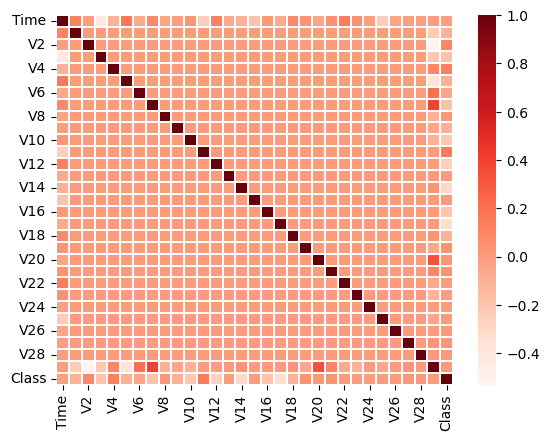

In [10]:
# revealing intricate data relationships
corr_data = df.corr()
sns.heatmap(corr_data, cmap = 'Reds', linewidths = 0.1)
plt.show()

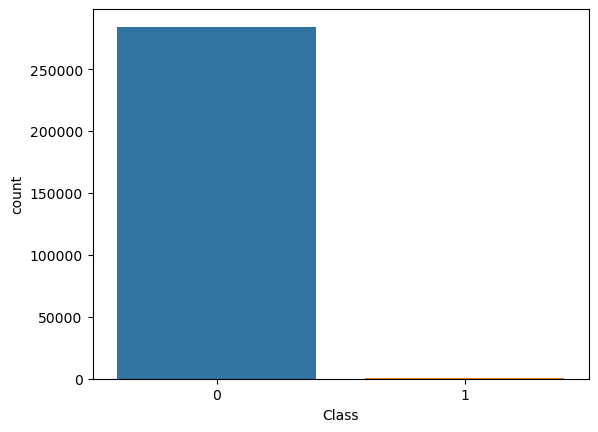

In [11]:
# count plot of the target variable 
cplt = sns.countplot(x = 'Class', data =df)

Hence, we have a highly Biased data 

###### Feature scaling


we will import 'StandardScaler' function from 'sklearn.preprocessing' and apply 'fit_transform to standardize the 'Amount' Column, ensuring data alignment to bring uniformity and scale to our dataset. 

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

In [14]:
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


######  dropping unnecessary columns


We will remove the Time column from our Dataframe using drop method for focussed analysis.

In [15]:
df = df.drop(['Time'], axis =1)

In [16]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


###### Handling duplicate data

we will remove the duplicate rows from our dataframe using drop

In [17]:
df.duplicated().sum()

9144

So we have 9144 duplicate rows in our data and we will drop them better analysis

In [18]:
df = df.drop_duplicates()
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


### Target variable Separating

In [19]:
X = df.drop('Class', axis = 1)
y  = df['Class']

### Splitting the data into Train and Test set

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7 , test_size = 0.3 , random_state =4)

### Dealing with biased data (SMOTE)

we import smote (Synthetic Minority Oversampling techcnique) from 'imblearn.over_sampling' library.

By creating a SMOTE object and employing the 'fit_resample' method on our feature matrix 'X' and target variable 'y,' we ensure that our dataset is enriched with synthetic samples, enhancing its representation of minority classes. 

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
smote = SMOTE()
X_res, y_res = smote.fit_resample(x_train,y_train)

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

We will use Logistic Regression algorithm for its effectiveness in binary classification tasks. This model works by calculating the probabilities of binary outcome and making decisions based on a specified threshold. 

After fitting our algorithm , we will employ 10 fold cross validation to rigorously evalute its performance across multiple subsets of data. 


In [25]:
lg_model = LogisticRegression()

In [26]:
lg_model.fit(x_train, y_train)

LogisticRegression()

In [27]:
cv_results = cross_val_score(lg_model, x_train, y_train, cv =10)


In [28]:
cv_results

array([0.99901539, 0.99953361, 0.99906721, 0.99922268, 0.99911899,
       0.99932629, 0.99911899, 0.99901534, 0.99896352, 0.99917081])

In [29]:
lg_mean_score = round(cv_results.mean(),4)
lg_mean_score

0.9992

### Linear Discriminant Analysis

LDA is a versatile technique known for both dimentionaly reduction and classificaiton tasks. LDA operates by finding linear combinations of features that optimally separate different classes, making it ideal for discriminating between multiple classes with interpretability. 

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [31]:
lda = LinearDiscriminantAnalysis()

In [32]:
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [33]:
cv_result = cross_val_score(lda, x_train, y_train, cv = 10)

In [34]:
lda_mean_score = round(cv_result.mean(),4)

In [35]:
lda_mean_score

0.9994

### Gaussian Naive Bayes


For versatile modeling technique, we will use Gaussian Naive Bayes (GNB) model, rooted in Bayesian probability theory. GNB is well suited for classffication task, especially when dealing with continous or real valued features. 
GNB is a probabilistic classfification algorithm that assumes that feature within each class follows a gaussian distribution. Despite its 'naive' assumption of feature independence, it often performs surprisingly well in practise and, expecially when deal dealing with continous or real valued data. It calculates the probablity of a data point belonging to a particular class using Bayes theorem.

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
cv_res= cross_val_score(gnb, x_train, y_train, cv =10)
gnb_mean_score = round(cv_res.mean(),4)
gnb_mean_score

0.9774

### Studying the best model

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
y_pred_lg = lg_model.predict(x_test)
y_pred_lda = lda.predict(x_test)
y_pred_gnb = gnb.predict(x_test)

 Calculate Accuracy Score

In [39]:
# Accuracy score for Logistic Regression
accuracy_lg = accuracy_score(y_test, y_pred_lg)
print(f"Accuracy Score (Logistic Regression): {accuracy_lg:.4f}")

# Accuracy score for LDA
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f"Accuracy Score (LDA): {accuracy_lda:.4f}")

# Accuracy score for Gaussian Naive Bayes
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Accuracy Score (Gaussian Naive Bayes): {accuracy_gnb:.4f}")

Accuracy Score (Logistic Regression): 0.9990
Accuracy Score (LDA): 0.9994
Accuracy Score (Gaussian Naive Bayes): 0.9779


Logistic Regression and LDA have higher accuracy scores compared to Gaussian Naive Bayes, suggesting they are more effective in correctly classifying instances in our test dataset.

Generate Confusion Matrix

In [42]:
# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lg)
print("Confusion Matrix (Logistic Regression):\n", cm_lr)

# Confusion matrix for LDA
cm_lda = confusion_matrix(y_test, y_pred_lda)
print("\nConfusion Matrix (LDA):\n", cm_lda)

# Confusion matrix for Gaussian Naive Bayes
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print("\nConfusion Matrix (Gaussian Naive Bayes):\n", cm_gnb)


Confusion Matrix (Logistic Regression):
 [[82537    12]
 [   68    82]]

Confusion Matrix (LDA):
 [[82535    14]
 [   36   114]]

Confusion Matrix (Gaussian Naive Bayes):
 [[80746  1803]
 [   24   126]]


Both Logistic Regression and LDA show promising performance with low false positives and decent detection rates. They strike a good balance for credit card fraud detection.

Generating Classification Report

In [44]:
# Classification report for Logistic Regression
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lg))

# Classification report for LDA
print("\nClassification Report (LDA):\n", classification_report(y_test, y_pred_lda))

# Classification report for Gaussian Naive Bayes
print("\nClassification Report (Gaussian Naive Bayes):\n", classification_report(y_test, y_pred_gnb))


Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     82549
           1       0.87      0.55      0.67       150

    accuracy                           1.00     82699
   macro avg       0.94      0.77      0.84     82699
weighted avg       1.00      1.00      1.00     82699


Classification Report (LDA):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     82549
           1       0.89      0.76      0.82       150

    accuracy                           1.00     82699
   macro avg       0.95      0.88      0.91     82699
weighted avg       1.00      1.00      1.00     82699


Classification Report (Gaussian Naive Bayes):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     82549
           1       0.07      0.84      0.12       150

    accuracy                           0.98     82699
   

## Interpretation

Logistic Regression and LDA show higher precision for fraud detection compared to Naive Bayes, meaning they are more cautious in flagging transactions as fraudulent, resulting in fewer false alarms.

LDA performs slightly better than Logistic Regression in terms of precision and recall for detecting fraudulent transactions. It strikes a good balance between minimizing false positives and capturing actual fraud cases.



While Naive Bayes has the highest recall (84%), indicating it detects a higher proportion of fraudulent transactions, its low precision (7%) leads to a higher rate of false positives, which can impact operational efficiency and customer experience negatively.

 **LDA may be preferred for credit card fraud detection due to their balanced performance in precision, recall, and overall accuracy.**